In [3]:
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

path = 'Documents/AI study/chest_xray'

In [4]:
imageGenerator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[.2, .2],
    horizontal_flip=True,
    validation_split=.1
)

In [5]:
trainGen = imageGenerator.flow_from_directory(
    os.path.join('./chest_xray/train'),
    target_size=(64, 64),
    subset='training'
)

validationGen = imageGenerator.flow_from_directory(
    os.path.join('./chest_xray/train'),
    target_size=(64, 64),
    subset='validation'
)

Found 4695 images belonging to 2 classes.
Found 521 images belonging to 2 classes.


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Dropout

In [8]:
model = Sequential()

model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(2))
model.add(Dropout(rate=0.1))

#model.add(Conv2D(8, 3, padding='same', activation='relu'))
#model.add(MaxPooling2D(2))
#model.add(layers.Dropout(rate=0.1))

#model.add(Conv2D(64, 3, padding='same', activation='relu'))
#model.add(MaxPooling2D(2))
#model.add(layers.Dropout(rate=0.3))

model.add(Flatten())
#model.add(Dense(128, activation='relu'))
#model.add(layers.Dropout(rate=0.1))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0         
_________________________________________________________________
dense (Dense)                (None, 16)                262160    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 34        
Total params: 262,642
Trainable params: 262,642
Non-trainable params: 0
__________________________________________________

In [9]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy', 
    metrics=['acc'],
)

In [10]:
epochs = 1
history = model.fit_generator(
    trainGen, 
    epochs=epochs,
    steps_per_epoch=trainGen.samples / epochs, 
    validation_data=validationGen,
    validation_steps=trainGen.samples / epochs,
)

Instructions for updating:
Please use Model.fit, which supports generators.
 147/4695 [..............................] - 139s 947ms/step - loss: 0.4968 - acc: 0.7512 - val_loss: 0.4215 - val_acc: 0.8023


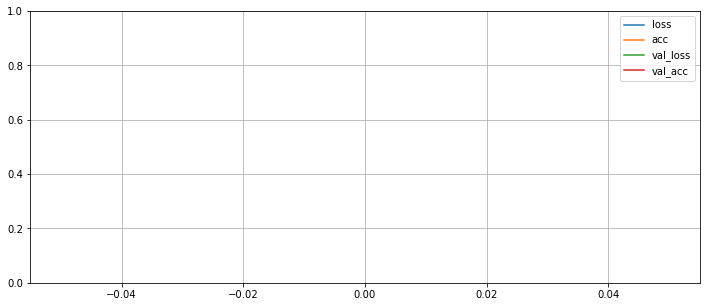

In [11]:
pd.DataFrame(history.history).plot(figsize=(12, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [12]:
from tensorflow.keras.preprocessing.image import array_to_img
import numpy as np

In [13]:
testGenerator = ImageDataGenerator(
    rescale=1./255
)

testGen = imageGenerator.flow_from_directory(
    os.path.join(path, 'test_set'),
    target_size=(64, 64),
)

model.evaluate_generator(testGen)

FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: 'Documents/AI study/chest_xray\\test_set'